This notebook test the variance of 
$$I_{\varphi}(\epsilon) = \sum_{x \in \mathcal{X}_{\epsilon}} \varphi(x)$$
where $\varphi : \mathbb{R}^d \mapsto \mathbb{R}$ is a function, $\mathcal{X}_{0}$ is a stationary Poisson point process of intensity $\rho$ and $\mathcal{X}_{\epsilon}$ is tha corresponding pushed point process at time $t$ and with step $\epsilon$.

The goals is to show that $Var(I_{\varphi}(\epsilon)) < Var(I_{\varphi}(0)$ for $0< \epsilon <\epsilon_0 $

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

# to delete this cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format='retina'
import os
import sys
sys.path.insert(0, os.path.abspath('../src/'))

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
def regression_line(intenisty, std):
    log_intensity = np.log([intensity]).T
    log_std = np.log([std]).T
    std_reg = LinearRegression().fit(log_intensity, log_std)
    return log_intensity*std_reg.coef_ + std_reg.intercept_
    

For d = 3

In [3]:
def f_3(x, window):
    return np.array([int(window.indicator_function(p) == True) for p in x])

def f_1(x) :
    return np.linalg.norm(x, axis=1)**2

def f_2(x):
    return np.sum(x, axis=1)/(f_1(x) +1)

def f_4(x):
    return -3*np.cos(f_1(x)) + 4*np.sin(f_2(x))




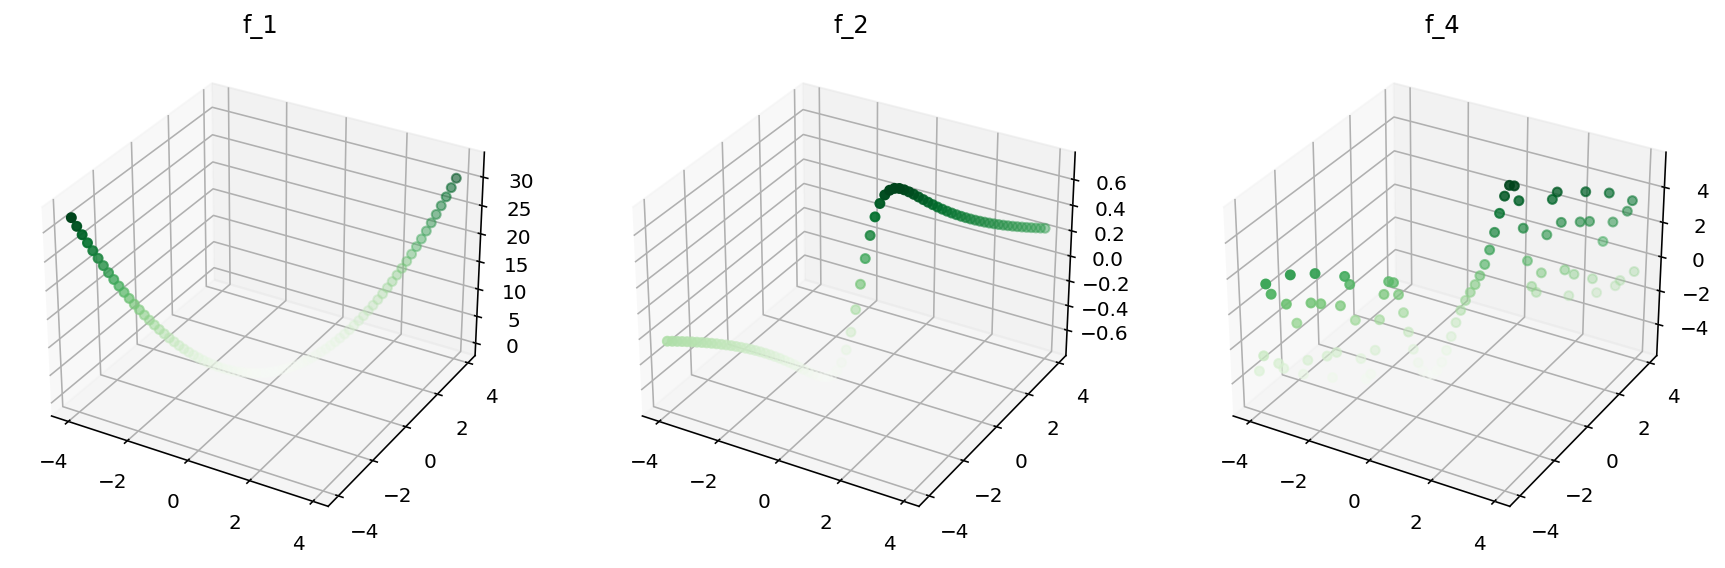

In [4]:
import matplotlib.pyplot as plt

x = np.arange(-4, 4, 0.1)
z_f_1 = f_1(np.array([x, x]).T)
z_f_2 = f_2(np.array([x, x]).T)
z_f_4 = f_4(np.array([x, x]).T)
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter3D(x, x, z_f_1, c=z_f_1, cmap='Greens')
ax.set_title("f_1")
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter3D(x, x, z_f_2, c=z_f_2, cmap='Greens')
ax.set_title("f_2")
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter3D(x, x, z_f_4, c=z_f_4, cmap='Greens')
ax.set_title("f_4")
plt.show()

In [18]:
# Creat a poisson point process
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import time 

from structure_factor.point_processes import HomogeneousPoissonPointProcess
from structure_factor.point_pattern import PointPattern
from structure_factor.spatial_windows import BallWindow, BoxWindow
from GPPY.gravity_point_process import GravityPointProcess

d = 3
simu_window = BallWindow(center=[0]*d, radius=8)
window = BallWindow(center=[0]*d, radius=4)
intensity = 6
samples_nb = 20
mean_points_nb = intensity*simu_window.volume 
print("points_nb=", mean_points_nb)
# list of poisson pp
poisson = HomogeneousPoissonPointProcess(intensity)
poisson_pp = [poisson.generate_point_pattern(window=simu_window) for _ in range(samples_nb)]
poisson_pp_res = [p.restrict_to_window(window) for p in poisson_pp]
# mean and var for poisson
f1_poisson = [np.sum(f_1(p.points))/p.points.shape[0] for p in poisson_pp_res]
mean_f1_poisson = stat.mean(f1_poisson)
std_f1_poisson = stat.stdev(f1_poisson)
f2_poisson = [np.sum(f_2(p.points))/p.points.shape[0] for p in poisson_pp_res]
mean_f2_poisson = stat.mean(f2_poisson)
std_f2_poisson = stat.stdev(f2_poisson)
f4_poisson = [np.sum(f_4(p.points))/p.points.shape[0] for p in poisson_pp_res]
mean_f4_poisson = stat.mean(f4_poisson)
std_f4_poisson = stat.stdev(f4_poisson)
#push
gpp_pp = [GravityPointProcess(p) for p in poisson_pp]
epsilon_th = gpp_pp[0].epsilon
print("epsilon_th", epsilon_th)
epsilons = [-0.07, -0.04, -epsilon_th, -0.004, -0.001, 0.001, 0.004, epsilon_th, 0.006, 0.008, 0.01, 0.04, 0.07]
means_f1_push, stds_f1_push, means_f2_push, stds_f2_push, means_f4_push, stds_f4_push = [], [], [], [], [], []
time_strat = time.time() 
print("start_time", time.time() - time_strat)
print("----------------------------------------------")
for epsilon in epsilons:
    print("epsilon", epsilon)
    if __name__ == "__main__":
        gpp_pp = [GravityPointProcess(p) for p in poisson_pp]
        push_pp = [g.pushed_point_pattern(epsilon=epsilon, stop_time=1) for g in gpp_pp]
        push_pp_res = [p.restrict_to_window(window) for p in push_pp]
        # mean number of points in the restricted window
        pois_res_pt_nb = stat.mean(poisson_pp_res[i].points.shape[0] for i in range(samples_nb))
        push_res_pt_nb = stat.mean(push_pp_res[i].points.shape[0] for i in range(samples_nb))
        print("nb_pts_poi", pois_res_pt_nb, 
              "nb_pts_pu", push_res_pt_nb)
        f1_push = [np.sum(f_1(p.points))/p.points.shape[0] for p in push_pp_res]
        means_f1_push.append(stat.mean(f1_push))
        stds_f1_push.append(stat.stdev(f1_push))
        f2_push = [np.sum(f_2(p.points))/p.points.shape[0] for p in push_pp_res]
        means_f2_push.append(stat.mean(f2_push))
        stds_f2_push.append(stat.stdev(f2_push))
        f4_push = [np.sum(f_4(p.points))/p.points.shape[0] for p in push_pp_res]
        means_f4_push.append(stat.mean(f4_push))
        stds_f4_push.append(stat.stdev(f4_push))
        print("std poisson f_1", std_f1_poisson, "std push", stds_f1_push)
        print("std poisson f_2", std_f2_poisson, "std push", stds_f2_push)
        print("std poisson f_4", std_f4_poisson, "std push", stds_f4_push)
        print("----------------------------------------------")
time_end = time.time()
print("time: ", time_end - time_strat)

points_nb= 12867.963509103793
epsilon_th 0.005503212081491044
start_time 9.202957153320312e-05
----------------------------------------------
epsilon -0.07
nb_pts_poi 1606.85 nb_pts_pu 1562.05
std poisson f_1 0.07537357788353347 std push [0.2831667991227399]
std poisson f_2 0.006640739036277143 std push [0.026807555717369584]
std poisson f_4 0.06003518693282206 std push [0.13924593747407082]
----------------------------------------------
epsilon -0.04
nb_pts_poi 1606.85 nb_pts_pu 1592.15
std poisson f_1 0.07537357788353347 std push [0.2831667991227399, 0.20666072872418467]
std poisson f_2 0.006640739036277143 std push [0.026807555717369584, 0.021244318969114568]
std poisson f_4 0.06003518693282206 std push [0.13924593747407082, 0.12200829557460868]
----------------------------------------------
epsilon -0.005503212081491044
nb_pts_poi 1606.85 nb_pts_pu 1602.5
std poisson f_1 0.07537357788353347 std push [0.2831667991227399, 0.20666072872418467, 0.11265691153558251]
std poisson f_2 0.00

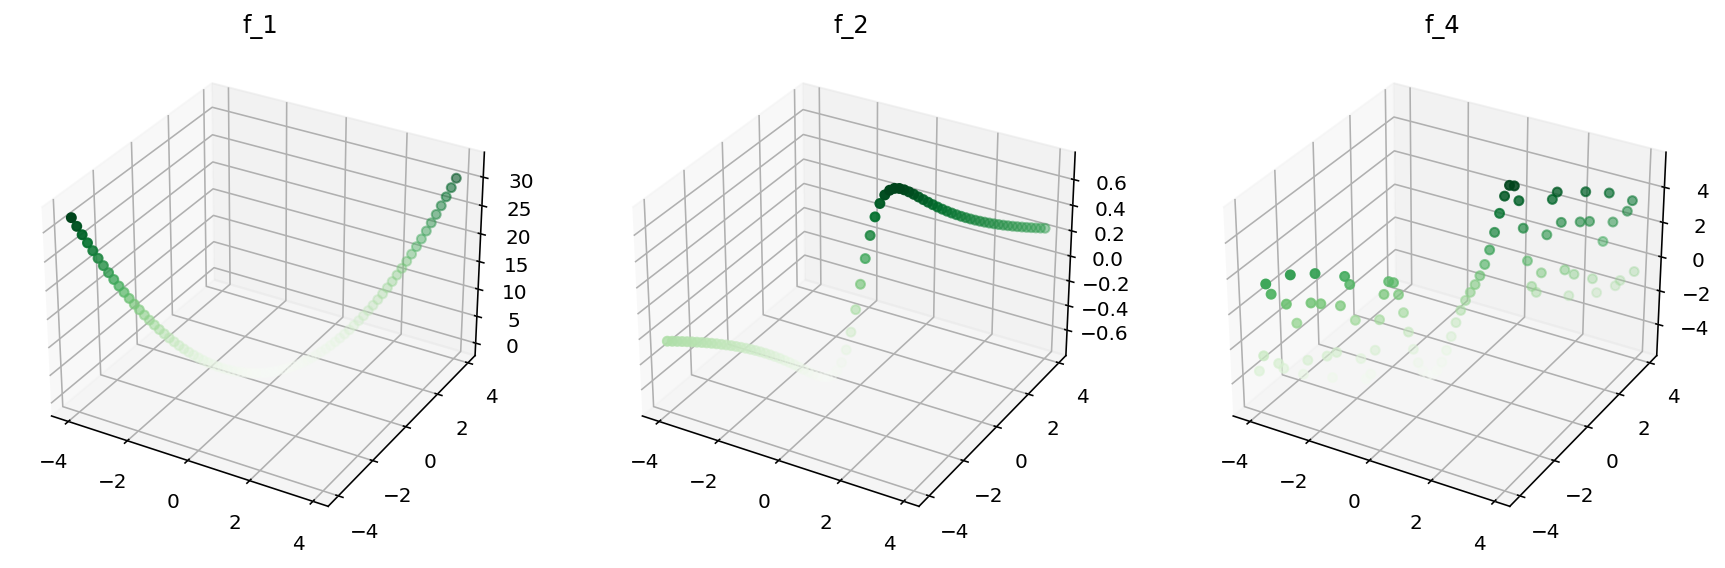

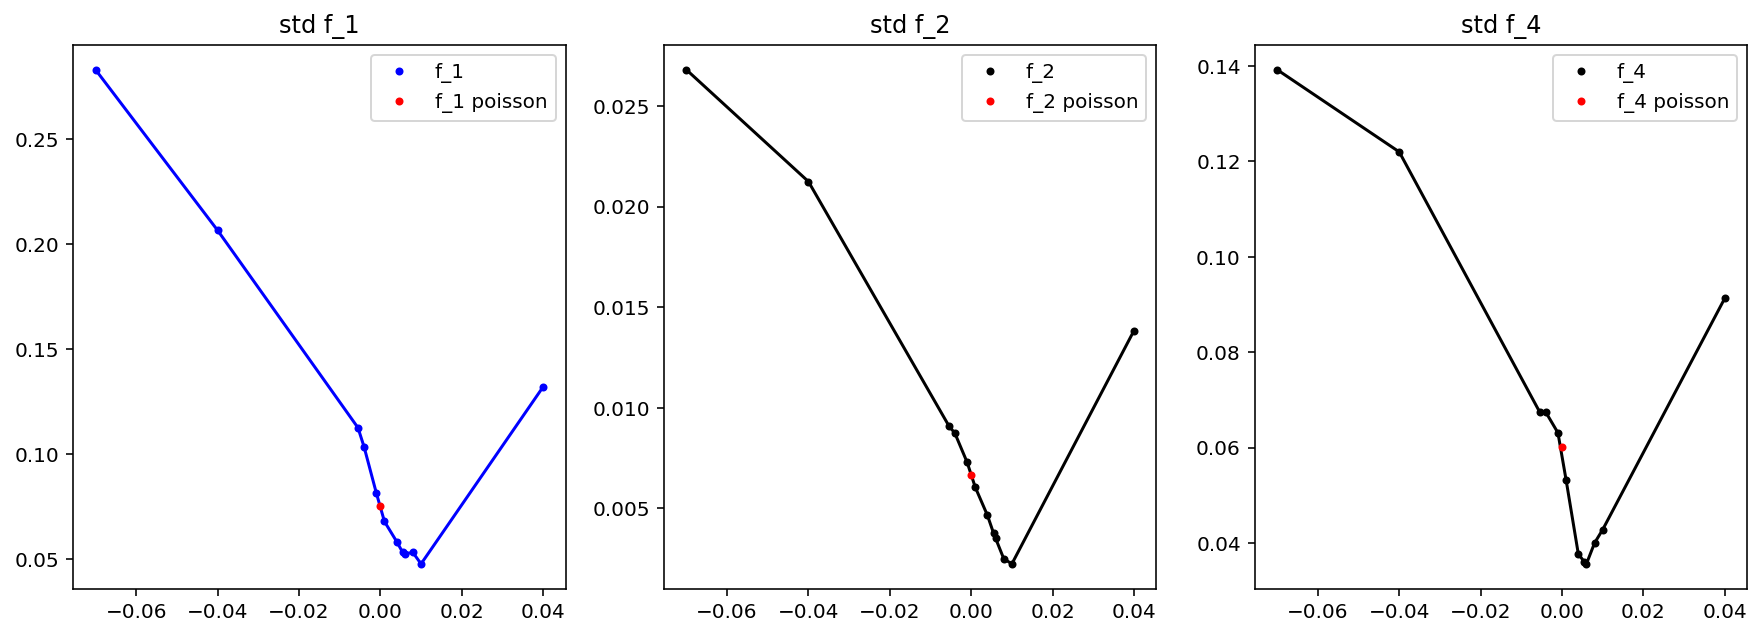

In [43]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter3D(x, x, z_f_1, c=z_f_1, cmap='Greens')
ax.set_title("f_1")
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter3D(x, x, z_f_2, c=z_f_2, cmap='Greens')
ax.set_title("f_2")
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter3D(x, x, z_f_4, c=z_f_4, cmap='Greens')
ax.set_title("f_4")
plt.show()

epsilons.append(0)
stds_f1_push.append(std_f1_poisson)
stds_f2_push.append(std_f2_poisson)
stds_f4_push.append(std_f4_poisson)
epsilons = epsilons[:12]
stds_f1_push = stds_f1_push[:12]
stds_f2_push = stds_f2_push[:12]
stds_f4_push = stds_f4_push[:12]
fig, ax = plt.subplots(1,3, figsize=(15, 5))

ax[0].plot(epsilons, stds_f1_push, "b.", label="f_1" )
ax[0].plot(epsilons, stds_f1_push, "b" )
ax[0].plot(0, std_f1_poisson, "r.", label="f_1 poisson")
ax[0].legend()
ax[0].set_title("std f_1")
ax[1].plot(epsilons, stds_f2_push,  "k.", label="f_2")
ax[1].plot(epsilons, stds_f2_push,  "k")
ax[1].plot(0, std_f2_poisson, "r.", label="f_2 poisson")
ax[1].legend()
ax[1].set_title("std f_2")
ax[2].plot(epsilons, stds_f4_push,  "k.", label="f_4")
ax[2].plot(epsilons, stds_f4_push,  "k")
ax[2].plot(0, std_f4_poisson, "r.", label="f_4 poisson")
ax[2].legend()
ax[2].set_title("std f_4")
plt.show()
plt.show()

In [9]:
# Creat a poisson point process
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import time 

from structure_factor.point_processes import HomogeneousPoissonPointProcess
from structure_factor.point_pattern import PointPattern
from structure_factor.spatial_windows import BallWindow, BoxWindow
from GPPY.gravity_point_process import GravityPointProcess

d = 3
simu_window = BallWindow(center=[0]*d, radius=10)
window = BallWindow(center=[0]*d, radius=4)
intensity = 6
samples_nb = 20
mean_points_nb = intensity*simu_window.volume 
print("points_nb=", mean_points_nb)
# list of poisson pp
poisson = HomogeneousPoissonPointProcess(intensity)
poisson_pp = [poisson.generate_point_pattern(window=simu_window) for _ in range(samples_nb)]
poisson_pp_res = [p.restrict_to_window(window) for p in poisson_pp]
# mean and var for poisson
f1_poisson = [np.sum(f_1(p.points))/p.points.shape[0] for p in poisson_pp_res]
mean_f1_poisson_2 = stat.mean(f1_poisson)
std_f1_poisson_2 = stat.stdev(f1_poisson)
f2_poisson = [np.sum(f_2(p.points))/p.points.shape[0] for p in poisson_pp_res]
mean_f2_poisson_2 = stat.mean(f2_poisson)
std_f2_poisson_2 = stat.stdev(f2_poisson)
f4_poisson = [np.sum(f_4(p.points))/p.points.shape[0] for p in poisson_pp_res]
mean_f4_poisson_2 = stat.mean(f4_poisson)
std_f4_poisson_2 = stat.stdev(f4_poisson)
#push
gpp_pp = [GravityPointProcess(p) for p in poisson_pp]
epsilon_th = gpp_pp[0].epsilon
print("epsilon_th", epsilon_th)
epsilons = [-epsilon_th, -0.004, -0.001, 0.001, 0.004, epsilon_th, 0.006, 0.008, 0.01, 0.04, 0.07]
means_f1_push_2, stds_f1_push_2, means_f2_push_2, stds_f2_push_2, means_f4_push_2, stds_f4_push_2 = [], [], [], [], [], []
time_strat = time.time() 
print("start_time", time.time() - time_strat)
print("----------------------------------------------")
for epsilon in epsilons:
    print("epsilon", epsilon)
    if __name__ == "__main__":
        gpp_pp = [GravityPointProcess(p) for p in poisson_pp]
        push_pp = [g.pushed_point_pattern(epsilon=epsilon, stop_time=1) for g in gpp_pp]
        push_pp_res = [p.restrict_to_window(window) for p in push_pp]
        # mean number of points in the restricted window
        pois_res_pt_nb = stat.mean(poisson_pp_res[i].points.shape[0] for i in range(samples_nb))
        push_res_pt_nb = stat.mean(push_pp_res[i].points.shape[0] for i in range(samples_nb))
        print("nb_pts_poi", pois_res_pt_nb, 
              "nb_pts_pu", push_res_pt_nb)
        f1_push = [np.sum(f_1(p.points))/p.points.shape[0] for p in push_pp_res]
        means_f1_push_2.append(stat.mean(f1_push))
        stds_f1_push_2.append(stat.stdev(f1_push))
        f2_push = [np.sum(f_2(p.points))/p.points.shape[0] for p in push_pp_res]
        means_f2_push_2.append(stat.mean(f2_push))
        stds_f2_push_2.append(stat.stdev(f2_push))
        f4_push = [np.sum(f_4(p.points))/p.points.shape[0] for p in push_pp_res]
        means_f4_push_2.append(stat.mean(f4_push))
        stds_f4_push_2.append(stat.stdev(f4_push))
        print("std poisson f_1", std_f1_poisson_2, "std push", stds_f1_push_2)
        print("std poisson f_2", std_f2_poisson_2, "std push", stds_f2_push_2)
        print("std poisson f_4", std_f4_poisson_2, "std push", stds_f4_push_2)
        print("----------------------------------------------")
time_end = time.time()
print("time: ", time_end - time_strat)

points_nb= 25132.741228718347
epsilon_th 0.005503212081491044
start_time 3.075599670410156e-05
----------------------------------------------
epsilon 0.001
nb_pts_poi 1598.65 nb_pts_pu 1598.95
std poisson f_1 0.10878042473023006 std push [0.09785279865394504]
std poisson f_2 0.0072636678157021566 std push [0.006650698113104366]
std poisson f_4 0.046594600470165524 std push [0.043197999384612884]
----------------------------------------------
epsilon 0.004
nb_pts_poi 1598.65 nb_pts_pu 1602.45
std poisson f_1 0.10878042473023006 std push [0.09785279865394504, 0.07101517192964106]
std poisson f_2 0.0072636678157021566 std push [0.006650698113104366, 0.005240036084384389]
std poisson f_4 0.046594600470165524 std push [0.043197999384612884, 0.03548692819877802]
----------------------------------------------
epsilon 0.005503212081491044
nb_pts_poi 1598.65 nb_pts_pu 1605.05
std poisson f_1 0.10878042473023006 std push [0.09785279865394504, 0.07101517192964106, 0.06164792323705679]
std poisson

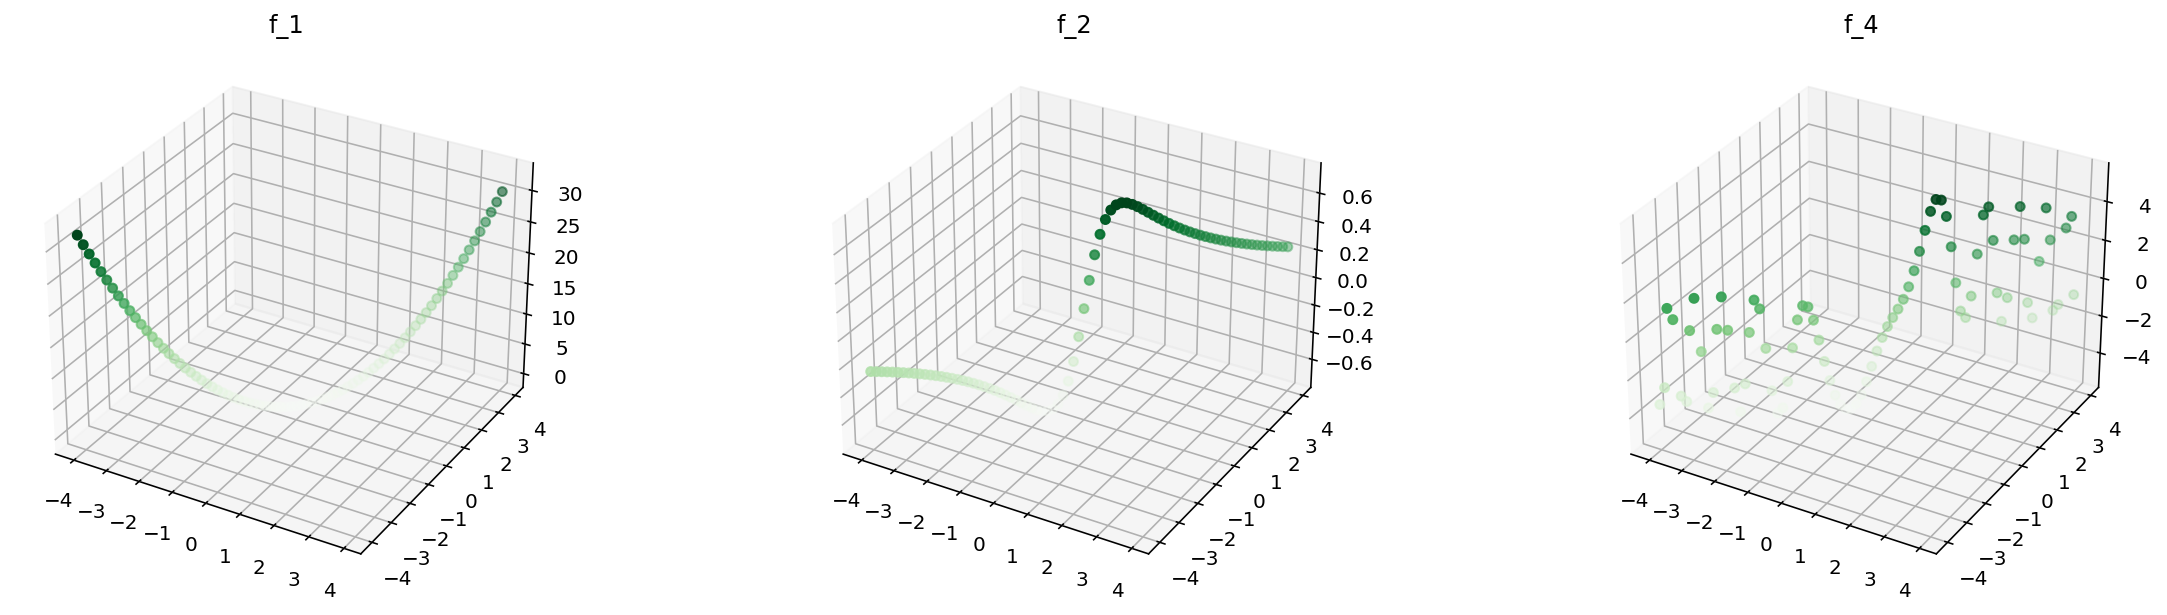

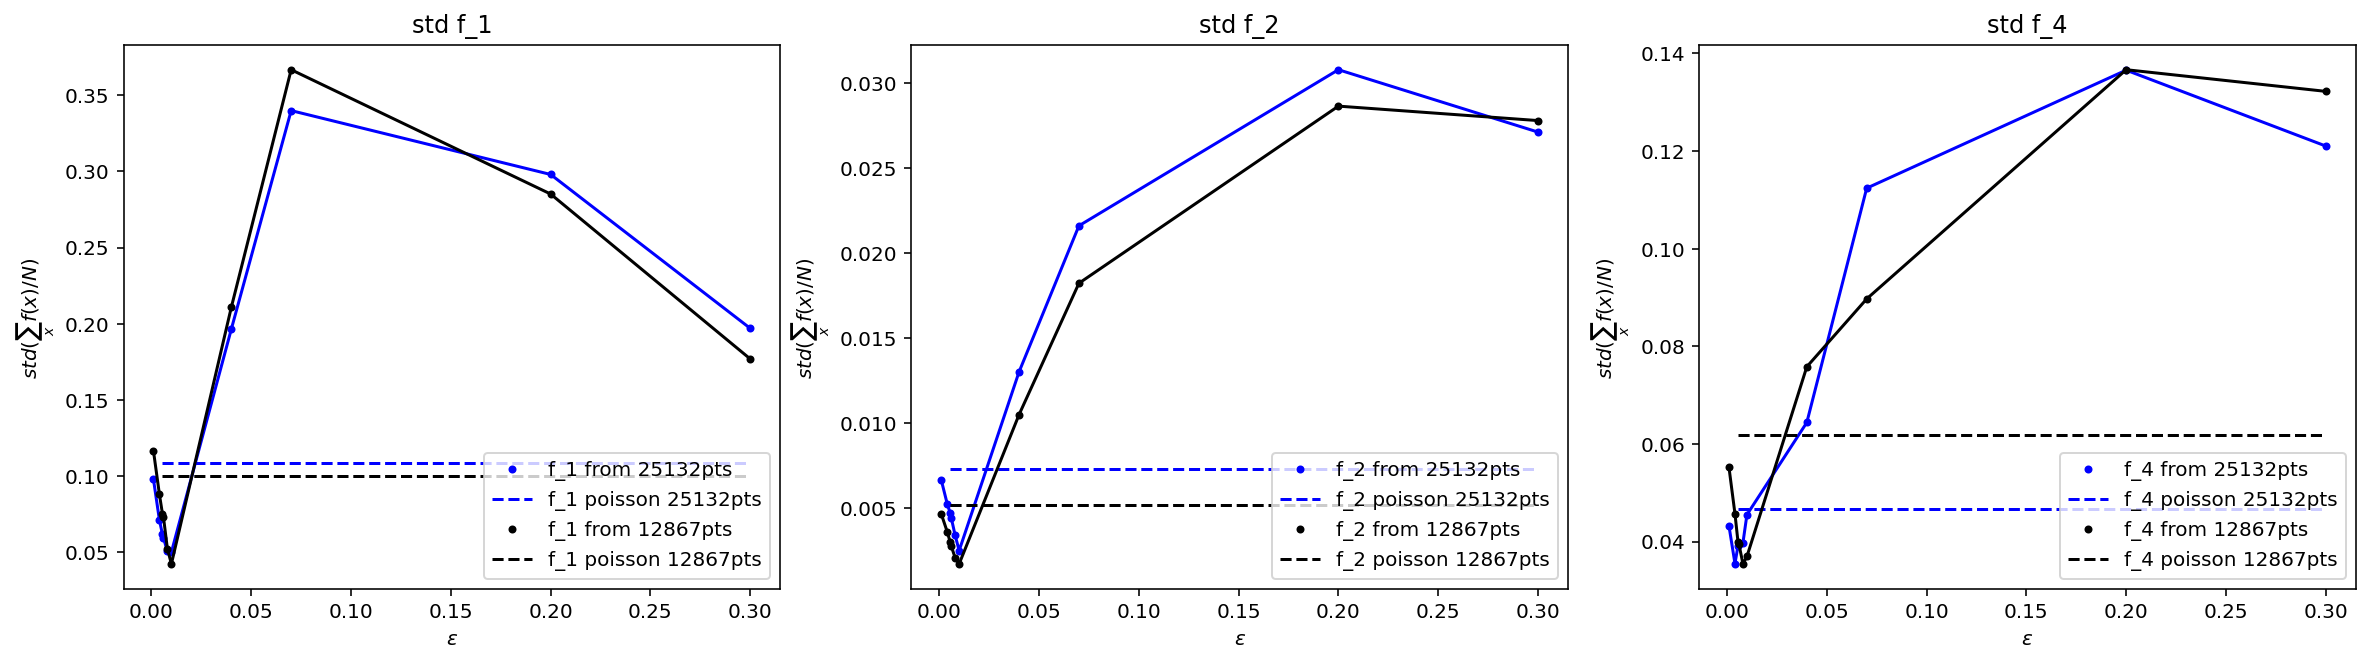

In [15]:
import matplotlib.pyplot as plt

x = np.arange(-4, 4, 0.1)
z_f_1 = f_1(np.array([x, x]).T)
z_f_2 = f_2(np.array([x, x]).T)
z_f_4 = f_4(np.array([x, x]).T)
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter3D(x, x, z_f_1, c=z_f_1, cmap='Greens')
ax.set_title("f_1")
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter3D(x, x, z_f_2, c=z_f_2, cmap='Greens')
ax.set_title("f_2")
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter3D(x, x, z_f_4, c=z_f_4, cmap='Greens')
ax.set_title("f_4")
plt.show()

fig, ax = plt.subplots(1,3, figsize=(20, 5))
ax[0].plot(epsilons, stds_f1_push_2, "b.", label="f_1 from 25132pts" )
ax[0].plot(epsilons, stds_f1_push_2, "b" )
ax[0].hlines(std_f1_poisson_2, xmin = epsilon_th, xmax=max(epsilons), color="b",linestyle="dashed", label="f_1 poisson 25132pts")
ax[0].plot(epsilons, stds_f1_push, "k.", label="f_1 from 12867pts" )
ax[0].plot(epsilons, stds_f1_push, "k" )
ax[0].hlines(std_f1_poisson, xmin = epsilon_th, xmax=max(epsilons), color="k",linestyle="dashed", label="f_1 poisson 12867pts")
ax[0].legend()
ax[0].set_xlabel(r"$\epsilon$")
ax[0].set_ylabel(r"$std(\sum_{x} f(x)/N)$ ")
ax[0].set_title("std f_1")
ax[1].plot(epsilons, stds_f2_push_2,  "b.", label="f_2 from 25132pts")
ax[1].plot(epsilons, stds_f2_push_2,  "b")
ax[1].hlines(std_f2_poisson_2, xmin = epsilon_th, xmax=max(epsilons), color="b",linestyle="dashed", label="f_2 poisson 25132pts")
ax[1].plot(epsilons, stds_f2_push,  "k.", label="f_2 from 12867pts")
ax[1].plot(epsilons, stds_f2_push,  "k")
ax[1].hlines(std_f2_poisson, xmin = epsilon_th, xmax=max(epsilons), color="k",linestyle="dashed", label="f_2 poisson 12867pts")
ax[1].legend()
ax[1].set_xlabel(r"$\epsilon$")
ax[1].set_ylabel(r"$std(\sum_{x} f(x)/N)$ ")
ax[1].set_title("std f_2")
ax[2].plot(epsilons, stds_f4_push_2,  "b.", label="f_4 from 25132pts")
ax[2].plot(epsilons, stds_f4_push_2,  "b")
ax[2].hlines(std_f4_poisson_2, xmin = epsilon_th, xmax=max(epsilons), color="b",linestyle="dashed", label="f_4 poisson 25132pts")
ax[2].plot(epsilons, stds_f4_push,  "k.", label="f_4 from 12867pts")
ax[2].plot(epsilons, stds_f4_push,  "k")
ax[2].hlines(std_f4_poisson, xmin = epsilon_th, xmax=max(epsilons), color="k",linestyle="dashed", label="f_4 poisson 12867pts")
ax[2].legend()
ax[2].set_xlabel(r"$\epsilon$")
ax[2].set_ylabel(r"$std(\sum_{x} f(x)/N)$ ")
ax[2].set_title("std f_4")
plt.show()

We are working in $\mathbb{R}^3$.
We compute the variance of the linear statistics of f_1 and f_2 using the father Poisson pp of intensity $\rho=6$ and the child Push for different epsilon.
We simulate the father Poisson in a Ball window of radius $R=6$ in the first experiment and $R=10$ in the second experiment.
We apply the dynamic to push the points then evaluate the linear statistic $\sum_{x} f(x)$ with $x \in B(0, 4)$  for both experiments.

    1- We vary the radius to see the effect of starting with a PPP in $\mathbb{R}^d$ not a restricted window, 
    i.e. to see if what we obtain holds with an infinite number of points.
    2- We remark that for $R=6$ and $R=10$ the std decrease similarly up to $\epsilon \approx 0.01$
    3- We remark that the mean number of points in the restricted window decrease dramatically as $\epsilon$ increase, that's why I wonder what happens when we have an infinite number of points. I think the behavior may change totally i.e., if a point leaves the window another will replace it and the mean number of point will be constant whatever the value of $\epsilon$.
    4- comparing the mean number of points in the restricted window it seems for $R=10$ (starting from a bigger window) the mean number of points of push in the restricted window decrease less than for $R=6$. 



## Study with negative epsilon to see if we have saddle point near zero


In [49]:
# Creat a poisson point process
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import time 

from structure_factor.point_processes import HomogeneousPoissonPointProcess
from structure_factor.point_pattern import PointPattern
from structure_factor.spatial_windows import BallWindow, BoxWindow
from GPPY.gravity_point_process import GravityPointProcess

d = 3
simu_window = BallWindow(center=[0]*d, radius=6)
window = BallWindow(center=[0]*d, radius=4)
intensity = 6
samples_nb = 20
mean_points_nb = intensity*simu_window.volume 
print("points_nb=", mean_points_nb)
# list of poisson pp
poisson = HomogeneousPoissonPointProcess(intensity)
poisson_pp = [poisson.generate_point_pattern(window=simu_window) for _ in range(samples_nb)]
poisson_pp_res = [p.restrict_to_window(window) for p in poisson_pp]
# mean and var for poisson
f1_poisson = [np.sum(f_1(p.points))/p.points.shape[0] for p in poisson_pp_res]
mean_f1_poisson = stat.mean(f1_poisson)
std_f1_poisson = stat.stdev(f1_poisson)
f2_poisson = [np.sum(f_2(p.points))/p.points.shape[0] for p in poisson_pp_res]
mean_f2_poisson = stat.mean(f2_poisson)
std_f2_poisson = stat.stdev(f2_poisson)
f4_poisson = [np.sum(f_4(p.points))/p.points.shape[0] for p in poisson_pp_res]
mean_f4_poisson = stat.mean(f4_poisson)
std_f4_poisson = stat.stdev(f4_poisson)
#push
gpp_pp = [GravityPointProcess(p) for p in poisson_pp]
epsilon_th = gpp_pp[0].epsilon
print("epsilon_th", epsilon_th)
epsilons = [-epsilon_th, -0.004, -0.001, -0.0005, -0.0001, 0.0001, 0.0005, 0.001, 0.004, 0.005, epsilon_th]
means_f1_push, stds_f1_push, means_f2_push, stds_f2_push, means_f4_push, stds_f4_push = [], [], [], [], [], []
time_strat = time.time() 
print("start_time", time.time() - time_strat)
print("----------------------------------------------")
for epsilon in epsilons:
    print("epsilon", epsilon)
    if __name__ == "__main__":
        gpp_pp = [GravityPointProcess(p) for p in poisson_pp]
        push_pp = [g.pushed_point_pattern(epsilon=epsilon, stop_time=1) for g in gpp_pp]
        push_pp_res = [p.restrict_to_window(window) for p in push_pp]
        # mean number of points in the restricted window
        pois_res_pt_nb = stat.mean(poisson_pp_res[i].points.shape[0] for i in range(samples_nb))
        push_res_pt_nb = stat.mean(push_pp_res[i].points.shape[0] for i in range(samples_nb))
        print("nb_pts_poi", pois_res_pt_nb, 
              "nb_pts_pu", push_res_pt_nb)
        f1_push = [np.sum(f_1(p.points))/p.points.shape[0] for p in push_pp_res]
        means_f1_push.append(stat.mean(f1_push))
        stds_f1_push.append(stat.stdev(f1_push))
        f2_push = [np.sum(f_2(p.points))/p.points.shape[0] for p in push_pp_res]
        means_f2_push.append(stat.mean(f2_push))
        stds_f2_push.append(stat.stdev(f2_push))
        f4_push = [np.sum(f_4(p.points))/p.points.shape[0] for p in push_pp_res]
        means_f4_push.append(stat.mean(f4_push))
        stds_f4_push.append(stat.stdev(f4_push))
        print("std poisson f_1", std_f1_poisson, "std push", stds_f1_push)
        print("std poisson f_2", std_f2_poisson, "std push", stds_f2_push)
        print("std poisson f_4", std_f4_poisson, "std push", stds_f4_push)
        print("----------------------------------------------")
time_end = time.time()
print("time: ", time_end - time_strat)

points_nb= 5428.672105403162
epsilon_th 0.005503212081491044
start_time 3.3855438232421875e-05
----------------------------------------------
epsilon -0.005503212081491044
nb_pts_poi 1611.2 nb_pts_pu 1608.7
std poisson f_1 0.09986721859794752 std push [0.13267508153663274]
std poisson f_2 0.007184791211345485 std push [0.010028380990662004]
std poisson f_4 0.06405331676984824 std push [0.0851757548115721]
----------------------------------------------
epsilon -0.004
nb_pts_poi 1611.2 nb_pts_pu 1610.35
std poisson f_1 0.09986721859794752 std push [0.13267508153663274, 0.12569230481791657]
std poisson f_2 0.007184791211345485 std push [0.010028380990662004, 0.009287205788333574]
std poisson f_4 0.06405331676984824 std push [0.0851757548115721, 0.07922574964754094]
----------------------------------------------
epsilon -0.001
nb_pts_poi 1611.2 nb_pts_pu 1610.4
std poisson f_1 0.09986721859794752 std push [0.13267508153663274, 0.12569230481791657, 0.10933046414875955]
std poisson f_2 0.007

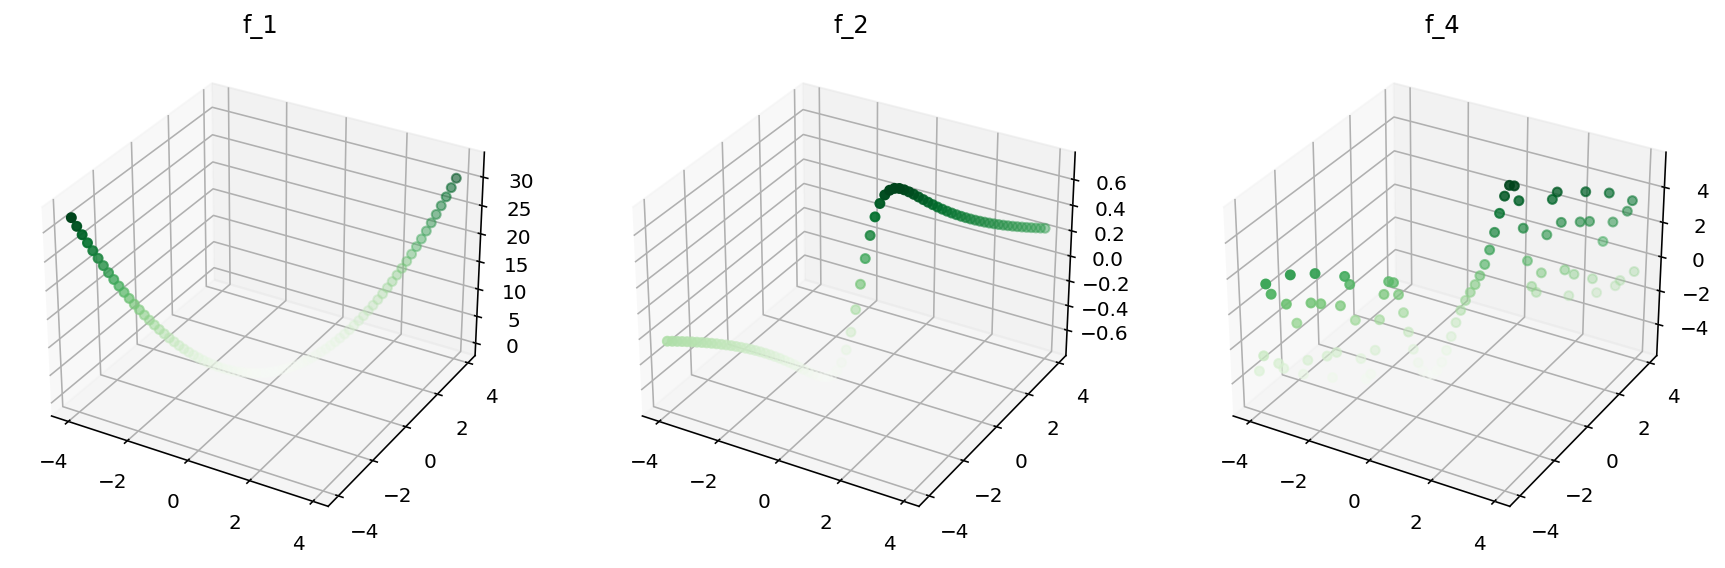

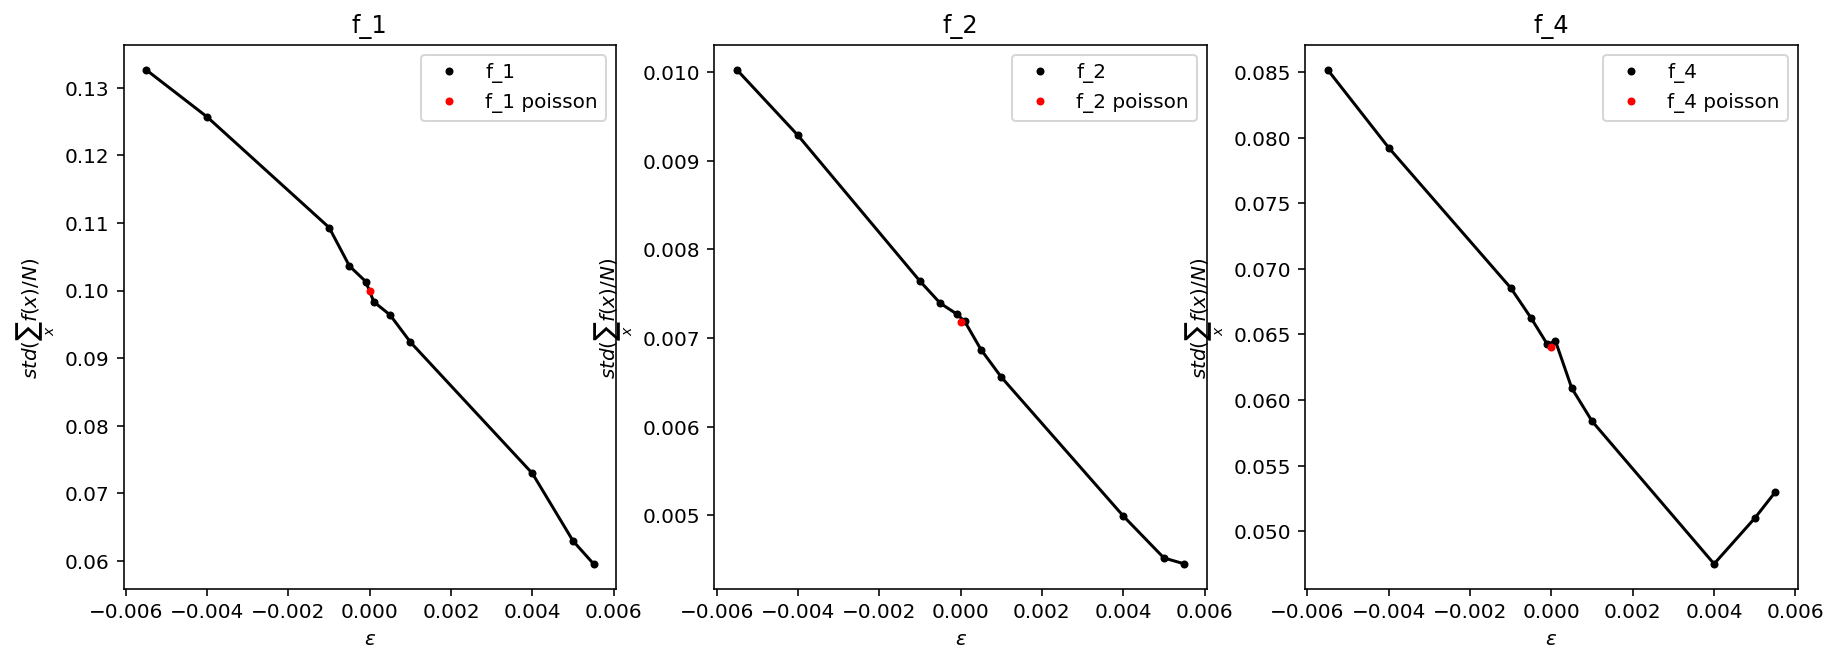

In [50]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter3D(x, x, z_f_1, c=z_f_1, cmap='Greens')
ax.set_title("f_1")
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter3D(x, x, z_f_2, c=z_f_2, cmap='Greens')
ax.set_title("f_2")
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter3D(x, x, z_f_4, c=z_f_4, cmap='Greens')
ax.set_title("f_4")
plt.show()

epsilons.append(0)
stds_f1_push.append(std_f1_poisson)
stds_f2_push.append(std_f2_poisson)
stds_f4_push.append(std_f4_poisson)
epsilons = epsilons[:11]
stds_f1_push = stds_f1_push[:11]
stds_f2_push = stds_f2_push[:11]
stds_f4_push = stds_f4_push[:11]
fig, ax = plt.subplots(1,3, figsize=(15, 5))

ax[0].plot(epsilons, stds_f1_push, "k.", label="f_1" )
ax[0].plot(epsilons, stds_f1_push, "k" )
ax[0].plot(0, std_f1_poisson, "r.", label="f_1 poisson")
ax[0].legend()
ax[0].set_xlabel(r"$\epsilon$")
ax[0].set_ylabel(r"$std(\sum_{x} f(x)/N)$ ")
ax[0].set_title("f_1")
ax[1].plot(epsilons, stds_f2_push,  "k.", label="f_2")
ax[1].plot(epsilons, stds_f2_push,  "k")
ax[1].plot(0, std_f2_poisson, "r.", label="f_2 poisson")
ax[1].legend()
ax[1].set_xlabel(r"$\epsilon$")
ax[1].set_ylabel(r"$std(\sum_{x} f(x)/N)$ ")
ax[1].set_title("f_2")
ax[2].plot(epsilons, stds_f4_push,  "k.", label="f_4")
ax[2].plot(epsilons, stds_f4_push,  "k")
ax[2].plot(0, std_f4_poisson, "r.", label="f_4 poisson")
ax[2].set_xlabel(r"$\epsilon$")
ax[2].set_ylabel(r"$std(\sum_{x} f(x)/N)$ ")
ax[2].legend()
ax[2].set_title("f_4")
plt.show()
plt.show()

In [47]:
epsilons

[-0.005503212081491044,
 -0.004,
 -0.001,
 -0.0005,
 -0.0001,
 0.0001,
 0.005,
 0.001,
 0.004,
 0.005503212081491044,
 0]